# Featurization and Model Tuning Project - Keerthana

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('concrete.csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# EDA

## 1a ) Univariate Analysis

In [3]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
data.shape

(1030, 9)

In [6]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

(array([[   8.,  362.,  384.,  202.,   74.,    0.,    0.,    0.,    0.,
            0.],
        [ 681.,  292.,   55.,    2.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 754.,  276.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0., 1026.,    4.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1030.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    6.,  203.,  568.,
          253.],
        [   0.,    0.,    0.,    0.,    0.,  145.,  532.,  331.,   22.,
            0.],
        [ 968.,   29.,   13.,   20.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1030.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.]]),
 array([   0. ,  114.5,  229. ,  343.5,  458. ,  572.5,  687. ,  801.5,
         916. , 1030.5, 1145. ]),
 <a list of 9 BarContainer objects>)

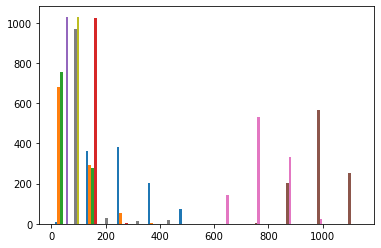

In [8]:
plt.hist(data, bins=10)

In [9]:
# The X-axis groups the observations from minimum to maximum along the axis on the basis of the discrete points or class intervals

# The Y-axis measures the frequency of occurance of observations for each discrete point or class interval.

C:\Users\Vikee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

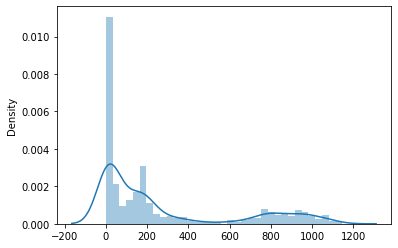

In [10]:
sns.distplot(data)

C:\Users\Vikee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

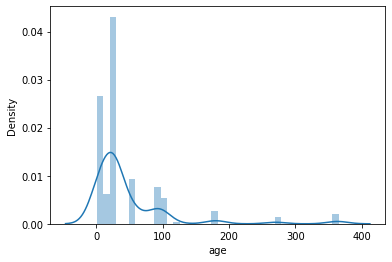

In [11]:
sns.distplot(data['age'])

C:\Users\Vikee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='strength', ylabel='Density'>

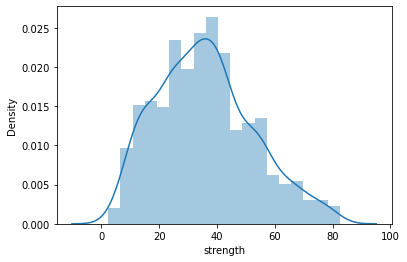

In [12]:
sns.distplot(data['strength'])

C:\Users\Vikee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='water', ylabel='Density'>

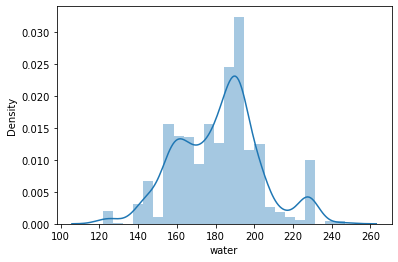

In [13]:
sns.distplot(data['water'])

<AxesSubplot:>

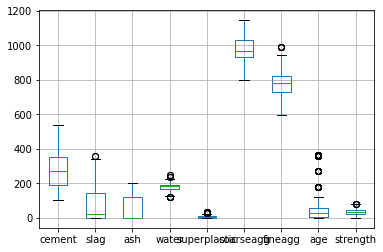

In [14]:
data.boxplot()

<AxesSubplot:>

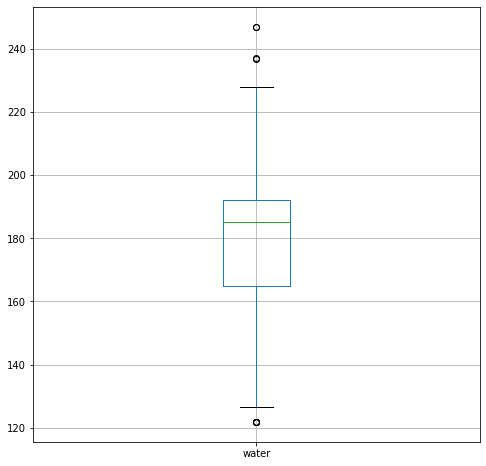

In [15]:
data.boxplot(column='water',return_type='axes',figsize=(8,8))

<AxesSubplot:>

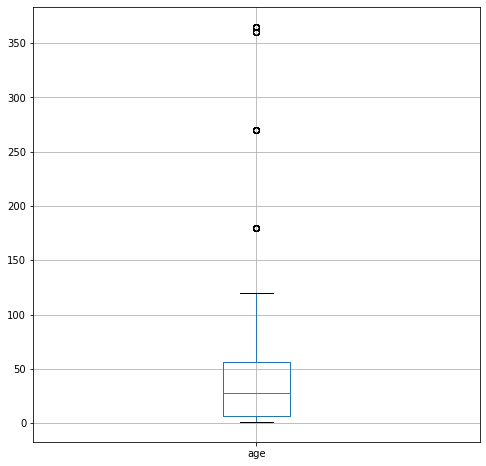

In [16]:
data.boxplot(column='age',return_type='axes',figsize=(8,8))

<AxesSubplot:>

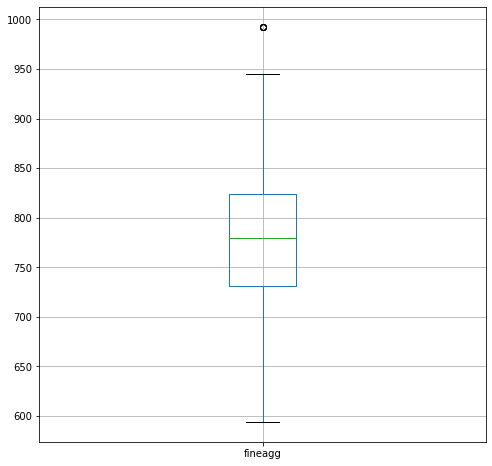

In [17]:
data.boxplot(column='fineagg',return_type='axes',figsize=(8,8))

<AxesSubplot:xlabel='superplastic'>

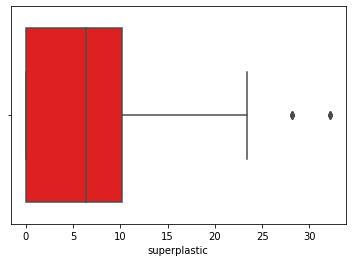

In [18]:
sns.boxplot(x= data.superplastic, color='red')

<AxesSubplot:>

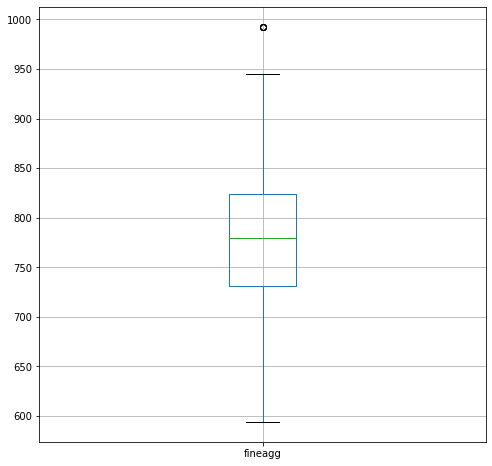

In [19]:
data.boxplot(column='fineagg',return_type='axes',figsize=(8,8))

In [20]:
# Outliers are present in water, age, fine agg,superplastic

In [21]:
data.skew(axis=0,skipna=True)

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [22]:
# water is symmetrically distributed
# age is right skewed

## 1b ) Multivariate Analysis

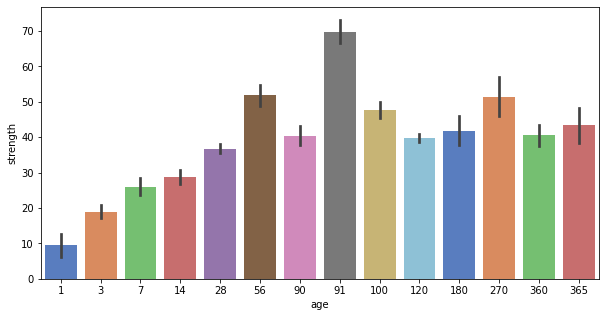

In [23]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='age', y='strength', data=data, palette='muted') 

<AxesSubplot:xlabel='slag', ylabel='strength'>

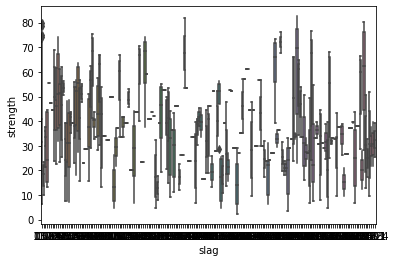

In [24]:
sns.boxplot(x='slag',y='strength',data=data)

<AxesSubplot:ylabel='age'>

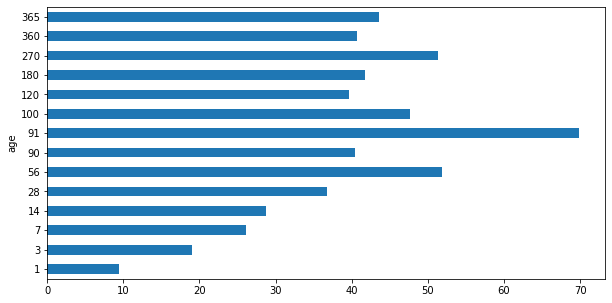

In [25]:
plt.figure(figsize=(10,5)) 
data.groupby('age')['strength'].mean().plot(kind='barh')

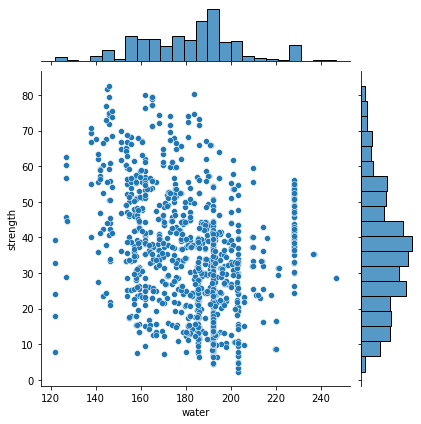

In [26]:
sns.jointplot(x='water',y='strength',data=data)

<AxesSubplot:xlabel='superplastic', ylabel='strength'>

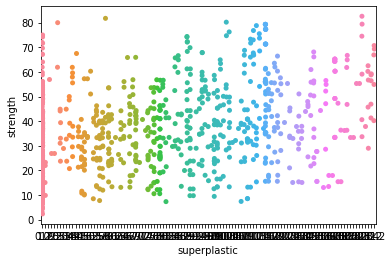

In [27]:
sns.stripplot(x='superplastic',y='strength',data=data,jitter=True)

<AxesSubplot:>

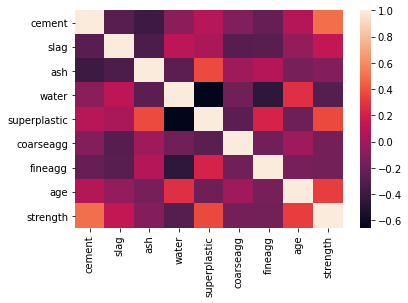

In [28]:
sns.heatmap(data.corr())

In [29]:
cor=data.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


## correlation between predictor variables and between the predictor variables

In [30]:
cor1= cor.abs().unstack().sort_values(ascending=False)
cor1

strength      strength     1.000000
age           age          1.000000
slag          slag         1.000000
ash           ash          1.000000
water         water        1.000000
                             ...   
superplastic  slag         0.043270
ash           coarseagg    0.009961
coarseagg     ash          0.009961
age           coarseagg    0.003016
coarseagg     age          0.003016
Length: 81, dtype: float64

In [31]:
cor1.head(20)

strength      strength        1.000000
age           age             1.000000
slag          slag            1.000000
ash           ash             1.000000
water         water           1.000000
coarseagg     coarseagg       1.000000
fineagg       fineagg         1.000000
superplastic  superplastic    1.000000
cement        cement          1.000000
superplastic  water           0.657533
water         superplastic    0.657533
cement        strength        0.497832
strength      cement          0.497832
water         fineagg         0.450661
fineagg       water           0.450661
cement        ash             0.397467
ash           cement          0.397467
              superplastic    0.377503
superplastic  ash             0.377503
strength      superplastic    0.366079
dtype: float64

In [32]:
cor1 = cor1[cor1 >= 0.4]
cor1

strength      strength        1.000000
age           age             1.000000
slag          slag            1.000000
ash           ash             1.000000
water         water           1.000000
coarseagg     coarseagg       1.000000
fineagg       fineagg         1.000000
superplastic  superplastic    1.000000
cement        cement          1.000000
superplastic  water           0.657533
water         superplastic    0.657533
cement        strength        0.497832
strength      cement          0.497832
water         fineagg         0.450661
fineagg       water           0.450661
dtype: float64

## correlation between predictor variables and target variable

In [33]:
corre = []
var =data.drop(['strength'],axis=1).columns

for v in var:
    corre.append(abs(data['strength'].corr(data[v])))

display(pd.DataFrame([var, corre], index = ['Variable', 'StrengthCorrelation']).T.\
        sort_values('StrengthCorrelation', ascending = False))

,Variable,StrengthCorrelation
0,cement,0.497832
4,superplastic,0.366079
7,age,0.328873
3,water,0.289633
6,fineagg,0.167241
5,coarseagg,0.164935
1,slag,0.134829
2,ash,0.105755


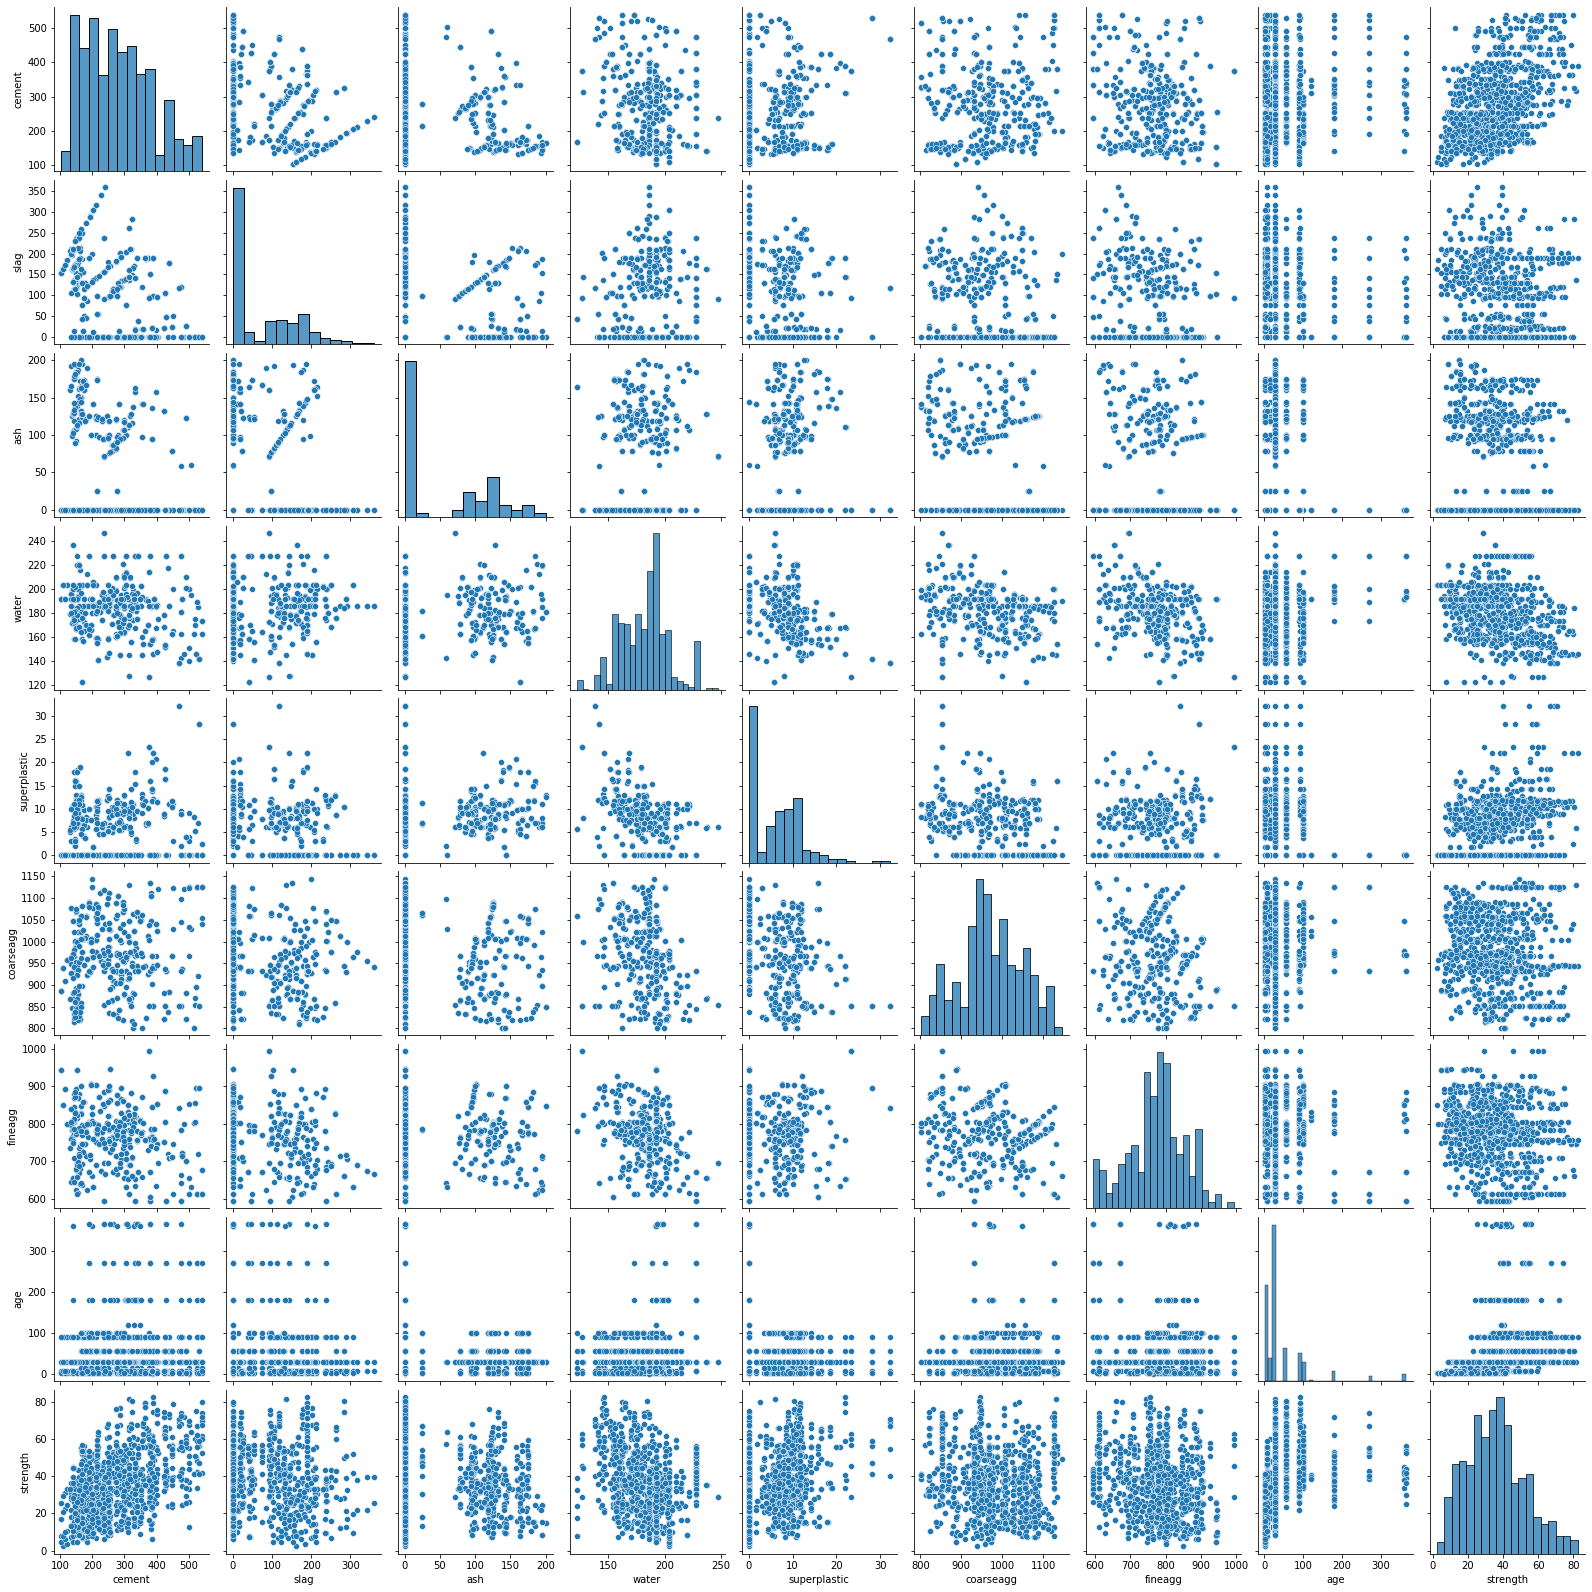

In [34]:
sns.pairplot(data)

## 1c ) Outliers Imputation

In [35]:
#find the outliers and replace them by median
for cols in data.columns[:-1]:
    q1 = data[cols].quantile(0.25)
    q3 = data[cols].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    data.loc[(data[cols] < low) | (data[cols] > high),cols]= data[cols].median()

<AxesSubplot:>

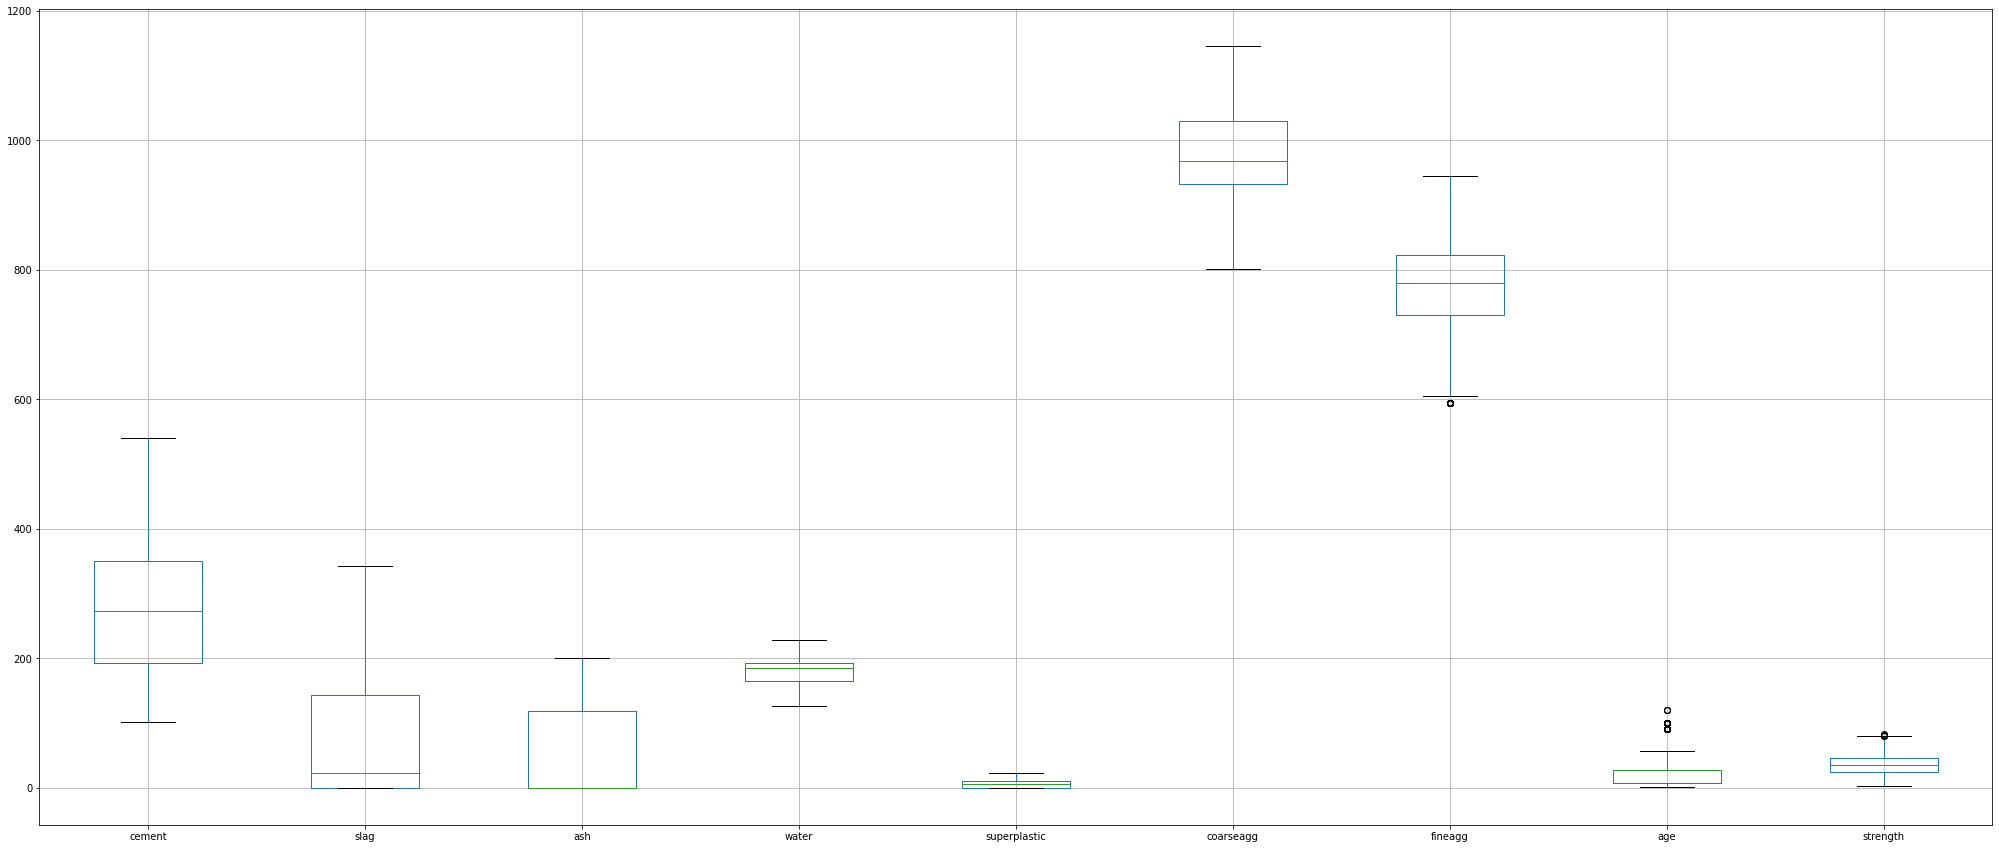

In [36]:
data.boxplot(figsize=(35,15))

### Observations: thus the outliers are repaced by median

# Feature Engineering techniques


## 2a) Feature Selection

In [37]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [38]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [39]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [40]:
Xscaled=scale.fit_transform(X)

In [41]:
X=pd.DataFrame(Xscaled,columns=X.columns)

In [42]:
X

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,0.089726,0.619702,0.000000,0.758383,0.000000,0.496512,0.440171,0.226891
1,0.152740,0.123356,0.621189,0.312623,0.461538,0.813372,0.576068,0.109244
2,0.337900,0.000000,0.478261,0.599606,0.235043,0.453198,0.761254,0.226891
3,0.374429,0.333236,0.000000,1.000000,0.000000,0.380814,0.216524,0.226891
4,0.120548,0.536101,0.000000,0.657791,0.388889,0.716279,0.292593,0.226891
...,...,...,...,...,...,...,...,...
1025,0.075342,0.000000,0.829585,0.526627,0.427350,0.465116,0.601140,0.226891
1026,0.980137,0.000000,0.000000,0.149901,0.273504,0.148547,0.853846,0.016807
1027,0.398174,0.339082,0.451274,0.522682,0.380342,0.200872,0.496581,0.226891
1028,0.547945,0.111079,0.000000,1.000000,0.000000,0.380814,0.216524,0.226891


In [43]:
y.shape

(1030,)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [45]:
X_train.shape ,y_train.shape

((721, 8), (721,))

In [46]:
X_test.shape ,y_test.shape

((309, 8), (309,))

In [47]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [48]:
# determine the mutual information
mi = mutual_info_regression(X_train, y_train)

In [49]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

age             0.350419
water           0.298887
cement          0.257013
coarseagg       0.188091
fineagg         0.174798
slag            0.146207
superplastic    0.137402
ash             0.057915
dtype: float64

<AxesSubplot:>

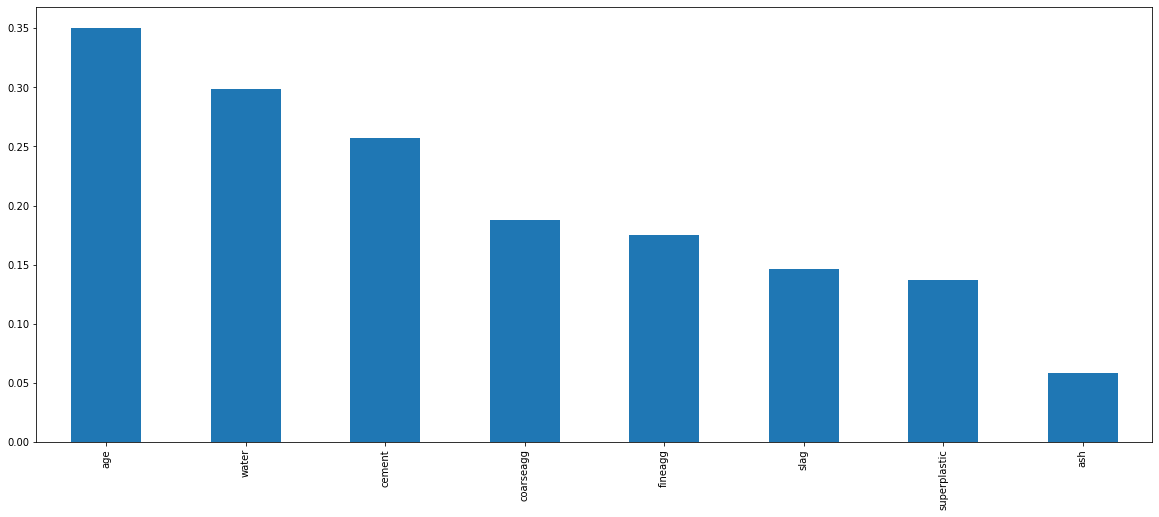

In [50]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

### Observation : the feature "ash" contributes the least in predicting the target among other independent variables and it can be dropped.

## 2b) Model Complexity

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [52]:
#Linear Regression fit

lr=LinearRegression()
lr.fit(X,y)
lpredict=lr.predict(X)  ## predicted y
print(r2_score(y,lpredict))  ## actual y vs predicted 

0.716208665535117


In [54]:
#Polynomial regression fit

In [55]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)   ## use fit_transform to fit and transform X. use this as X herafter
poly.fit(X_poly,y)

PolynomialFeatures(degree=4)

In [56]:
# Now lets instantiate another linear regression model and then fit the model using the polynomial features i.e. x_poly

lr1=LinearRegression()
lr1.fit(X_poly,y)
ppredict=lr1.predict(X_poly)  ## predicted y
print(r2_score(y,ppredict))   ## actual vs predicted



0.9801299691136468


### Observations :  The R2 score came out to be 0.98 and fpr tjhe linear it is 0.71 
### Clearly, the polynomial features of degree 4 helped to fit the data much better rather than simple linear features. The model should be of quadratic degree

## 2c)  Gaussians and  K-Means Clustering

In [59]:
from sklearn.cluster import KMeans 

In [60]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2)

In [61]:
# Fit K means on the scaled_df
k_means.fit(X_train)

KMeans(n_clusters=2)

In [62]:
k_means.inertia_ #WCSS

256.3851393294907

In [63]:
wss =[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(X_train)
    wss.append(KM.inertia_)

In [64]:
wss

[343.58237957860456,
 256.3851393294907,
 216.9279540600131,
 185.83208755420233,
 166.18338391240107,
 153.89848160407055,
 141.79521803856167,
 133.15378019600865,
 125.78566227663767,
 118.00728395066903]

In [65]:
labels = k_means.labels_

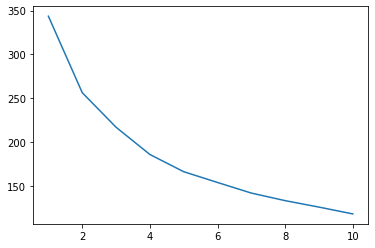

In [66]:
plt.plot(range(1,11), wss)

In [67]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [68]:
# Calculating silhouette_score
silhouette_score(X_train,labels)

0.25165746910721115

In [69]:
k_means1 = KMeans(n_clusters = 3)
k_means1.fit(X_train)
k_means1.inertia_
labels1 = k_means1.labels_

In [70]:
silhouette_score(X_train,labels1)

0.2609263407256486

In [71]:
k_means2 = KMeans(n_clusters = 4)
k_means2.fit(X_train)
k_means2.inertia_
labels2 = k_means2.labels_

In [72]:
silhouette_score(X_train,labels2)

0.2714904749140496

In [73]:
k_means2 = KMeans(n_clusters = 5)
k_means2.fit(X_train)
k_means2.inertia_
labels2 = k_means2.labels_

In [74]:
silhouette_score(X_train,labels2)

0.25919677477287206

### Observations : silhouette score is better for 4 clusters than for 3 clusters. So, final clusters will be 4

## Gaussian mixture model 

### Gaussian Mixture Model on the same data
### k-means only considers the mean to update the centroid while GMM takes into account the mean as well as the variance of the data

In [75]:
# training gaussian mixture model 

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(X_train)

#predictions from gmm
labelsgmm = gmm.predict(X_test)



In [76]:
silhouette_score(X_test,labelsgmm)

0.23791204275759162

### Observations: Kmeans  better score than the gaussian mixture model for clustering


# 4 a) Model Building


## Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [78]:
predictions=lm.predict(X_test)

In [79]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

9.065163582741866


In [80]:
lm.score(X_test, y_test)

0.6957102665747842

## Decision Tree Regressor

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)

DecisionTreeRegressor()

In [83]:
y_pred = dr.predict(X_test)

In [84]:
dr.score(X_test, y_test)

0.8431165587785625

In [85]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, dr.predict(X_test))

4.304077669902913

## Random Forest Regressor


In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rfr=RandomForestRegressor()

In [88]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [89]:
predictions = rfr.predict(X_test)
predictions

array([17.6576    , 19.5888    , 17.7888    , 53.2187    , 45.58791357,
       12.9872    , 46.5467    , 32.76397   , 25.7968    , 65.188     ,
       42.3787    , 33.7252    , 29.0426    , 38.3398    , 49.2139    ,
       26.5155    , 15.83      , 21.6224    , 35.79851667, 19.7179    ,
       47.3828    , 20.8279    , 69.8019    , 31.4792    , 35.02383333,
       16.1859    , 23.5787    , 35.6173    , 43.00585   , 22.1952    ,
       39.2523    , 36.442275  , 13.4197    , 36.284055  , 69.94622667,
       31.78321667, 31.40924   , 18.88104   , 12.6575    , 22.3541    ,
       32.7169    , 16.791     , 76.2443    , 10.8207    , 39.2523    ,
       13.9891    , 43.70980333, 35.8746    , 51.10904167, 42.39081333,
       26.4278    , 48.65588333, 15.8547    , 34.9174    , 40.5554825 ,
       18.1509    , 40.5538    , 42.95930333, 20.5538    , 51.12838667,
       25.26425   , 76.2443    , 16.8255    , 39.67716429, 18.348     ,
       35.33766667, 46.00736286, 59.61514667, 16.91466   , 71.35

In [90]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
rmse

5.479030131813917

In [91]:
rfr.score(X_test,y_test)

0.8888413185634979

In [92]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## XGBoost Regressor

In [93]:
import xgboost as xgb
from xgboost import XGBRegressor

In [94]:
xreg=xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [95]:
xreg.fit(X_train,y_train)
prediction = xreg.predict(X_test)

[12:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [96]:
xreg.score(X_test, y_test)

-0.10939914685132357

In [97]:

from sklearn.metrics import mean_squared_error

In [98]:
rmse = np.sqrt(mean_squared_error(y_test, prediction))

In [99]:

rmse

17.309156689257687

In [100]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(xreg, X_train, y_train, cv=kfold)
results

[12:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:17

C:\Users\Vikee\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([-0.13187045, -0.25618601, -0.07104064, -0.04987293, -0.25288215,
       -0.1878436 ,  0.09787623, -0.08332808, -0.63573567,  0.01751701])

In [101]:
np.average(results)

-0.15533662870892956

## Ada Boost Regressor

In [102]:

from sklearn.ensemble import AdaBoostRegressor


In [103]:

ada=AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential')

In [104]:
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.2, loss='exponential')

In [105]:
predictions=ada.predict(X_test)

In [106]:
from sklearn import metrics
from sklearn.metrics import r2_score, explained_variance_score,mean_squared_error

In [107]:

print('R2 score (Model Performance):',r2_score(y_test,predictions))    ## also can be written as : ada.score(X_test,y_test)

R2 score (Model Performance): 0.715585376331582


In [108]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))

RMSE: 8.764112765620961


In [109]:
ada.get_params() # to get the hyperparameters

{'base_estimator': None,
 'learning_rate': 0.2,
 'loss': 'exponential',
 'n_estimators': 50,
 'random_state': None}

### Observations : we see that the random forest regressor performs well among other models.

# 4 b) Performance improvement - hyperparameter tuning

In [110]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [111]:
param_grid = {'n_estimators': [10,20,50,70,100,200],
             'max_features': ['auto', 'sqrt','log2'],
             'max_leaf_nodes':[20,50,100,200],
             'max_depth':[15,20,25,30]}

In [112]:
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(rfr,param_grid,cv=10)

In [113]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [20, 50, 100, 200],
                         'n_estimators': [10, 20, 50, 70, 100, 200]})

In [114]:
grid.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 200,
 'n_estimators': 50}

In [115]:
grid.best_score_

0.8920741244641593

In [116]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [117]:
param_grid = {'n_estimators': [10,20,50,70,100,200],
             'max_features': ['auto', 'sqrt','log2'],
             'max_leaf_nodes':[20,50,100,200],
             'max_depth':[15,20,25,30]}

In [118]:
randomgrid=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,n_iter=10,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [119]:
randomgrid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.5s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [20, 50, 100, 200],
                                        'n_estimators': [10, 20, 50, 70, 100,
                                                         200]},
                   random_state=100, verbose=2)

In [120]:
randomgrid.best_params_

{'n_estimators': 70,
 'max_leaf_nodes': 200,
 'max_features': 'log2',
 'max_depth': 30}

In [121]:
randomgrid.best_score_

0.876405560985052

In [122]:
# using these best parameters in random forest regressor

In [123]:
rfr=RandomForestRegressor(n_estimators= 200, max_features='auto',max_depth=15,max_leaf_nodes=200)

In [124]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_leaf_nodes=200, n_estimators=200)

In [125]:
predictions = rfr.predict(X_test)
predictions

array([18.3661871 , 19.2523288 , 18.89942219, 56.80166417, 45.43258324,
       13.59848867, 46.46125864, 32.19202534, 26.98455159, 64.78660277,
       42.0079578 , 34.21813532, 29.16195578, 38.46080518, 48.15975053,
       26.82366971, 16.26245629, 20.52915672, 35.29762886, 20.18681826,
       45.63287234, 20.27786065, 68.64992822, 32.22786003, 34.96660089,
       14.81915388, 23.45797056, 36.58979477, 43.43987137, 20.92028292,
       39.8633771 , 37.25684932, 12.97481231, 37.0487831 , 70.09948631,
       32.31948389, 31.71698029, 19.19601803, 13.30868062, 23.15183601,
       33.56232404, 17.28931712, 77.09857351, 11.19489375, 39.8633771 ,
       14.18669194, 42.96198598, 35.38915312, 50.87397284, 42.62824965,
       26.10749357, 49.56165784, 16.87446528, 35.25131402, 40.85669177,
       17.46080295, 41.25717155, 41.44311541, 21.75696685, 51.37148235,
       24.53860503, 77.09857351, 15.73422571, 39.81458183, 18.2952088 ,
       36.73163291, 45.14856306, 59.28209123, 16.7434897 , 72.11

In [126]:
rfr.score(X_test,y_test)

0.887970429733951

### Obervation : we see that after using hyperparameter tuning using grid search and randomized search, the accuracy score has increased with appropriate hyperparameters that are best.

##  4c) Model performance range at 95% confidence level 

## Bootstrap Resampling

In [127]:
from sklearn.utils import resample

In [128]:
# configure bootstrap
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(data) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
# prepare train and test sets
    train = resample(data.values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in data.values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
    rfr.fit(X_train,y_train)
    predictions = rfr.predict(X_test)
    score=rfr.score(X_test,y_test)
    print(score)
    stats.append(score)
   

0.8913318859293057
0.8889628642294359
0.8866600528274233
0.8921700536998823
0.8904048798962335
0.8888599480401986
0.8896699883156077
0.8890493818197662
0.8887224316442446
0.8921554139762518
0.887755710137722
0.890909220957337
0.8863575527815954
0.8906942895289541
0.8891783341110951
0.887009855434907
0.8906785774566766
0.8883721856616322
0.8916881772927384
0.8894094994556269
0.88913088959341
0.8895459762191321
0.8872138059615424
0.8898184581214902
0.8902809000281995
0.8886793090527483
0.8918425314467995
0.8904061349755363
0.8902339280828921
0.8901305700259383
0.8913972109497361
0.8908133600856614
0.8874393812974908
0.8909549094013903
0.8914143182942799
0.8901633744626173
0.8884754932551817
0.889192305869219
0.8911876751153063
0.8885891048795598
0.8896296245289762
0.8884988931647357
0.8910465527418805
0.8864209490339902
0.8899218931908053
0.8898082600074262
0.8891017717396634
0.8875581156375681
0.8877455441834828
0.8899573406080371
0.8870234334727141
0.8893971145269692
0.8873011957898056

0.8895783576290064
0.891483871843322
0.8923758098871742
0.8887082720549375
0.8880998682927604
0.8924174369034551
0.8893784186645286
0.8888549374523584
0.8916673787688477
0.8906813372971921
0.8886423735111503
0.8900439221928279
0.8880792720607367
0.8891092098526512
0.88851523387117
0.8925925634664135
0.8906156499828015
0.8916669862747492
0.8890590261578905
0.8887241163398997
0.8878843014213638
0.8909852441125005
0.8901522572685474
0.890590377913337
0.8886782601053753
0.8900298692146881
0.8892201002560578
0.8887793051303474
0.8892864985151516
0.8890007493681819
0.8916927406018792
0.8874026765540777
0.8901276304480524
0.8899611826948112
0.8877599003627576
0.8874113775376232
0.888561935456072
0.8899834658639618
0.8882816936177438
0.8883076979507039
0.8890557212256279
0.8883480724108244
0.8918680980612808
0.889544964893726
0.8908153648405748
0.8922843612932935
0.8892014688959067
0.8901923622648212
0.8927440913042166
0.8864040940951632
0.8905236008258937
0.8915974602454785
0.8874930725046857

0.8890501231369371
0.8891689306715094
0.8905369408254559
0.887686893838181
0.889111860539036
0.8895729414873971
0.8890693373558224
0.8895539413390756
0.8899381517223117
0.8897218551816916
0.8891670894781522
0.8885723993615733
0.8876674787136318
0.889006186890156
0.8879893947714246
0.889144160432872
0.8879086792481645
0.890492818846364
0.889763308425265
0.8925033156654678
0.8900098706944387
0.8888527966581803
0.8893116941257668
0.888156655264768
0.8893585488479765
0.890236685012306
0.8878629968590404
0.889827545245007
0.8890149416097427
0.8868350652300703
0.8909476560975681
0.8922076387190061
0.8874347351849697
0.8902966268248067
0.8876618229823225
0.8907372922304
0.8896878839135733
0.8899681619191131
0.890021056816803
0.8894389691106501
0.8876744980792214
0.8889321065585054
0.8871578598710713
0.8900580921027155
0.8908895247639899
0.8886346551298677
0.8896786781914473
0.8883133748305783
0.8922220359890364
0.8922054503232162
0.8896543445119718
0.888334921341014
0.8886912965142674
0.88884

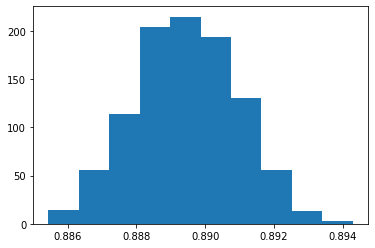

95.0 confidence interval 88.7% and 89.2%


In [129]:
# plot scores
import matplotlib.pyplot as plt
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### Observation : Model performance range at 95% confidence level is 88.7% and 89.2%

## 3) Feature Importance


In [130]:
rfr.feature_importances_

array([0.29368392, 0.07298249, 0.02237577, 0.14620345, 0.05747326,
       0.03265869, 0.03647603, 0.33814638])

In [131]:
print('FEATURE IMPORTANCE OF INDIVIDUAL FEATURES')
pd.Series(rfr.feature_importances_, index = X_train.columns)

FEATURE IMPORTANCE OF INDIVIDUAL FEATURES


cement          0.293684
slag            0.072982
ash             0.022376
water           0.146203
superplastic    0.057473
coarseagg       0.032659
fineagg         0.036476
age             0.338146
dtype: float64

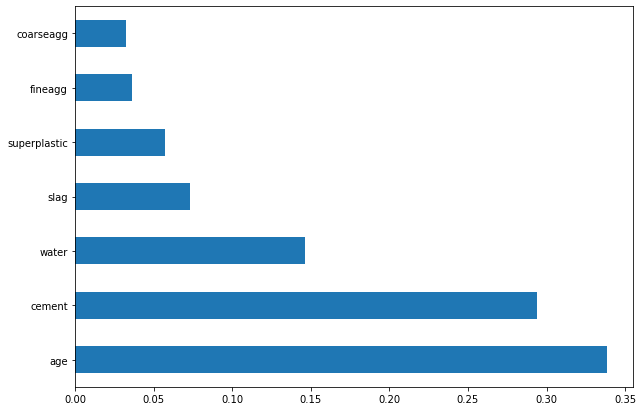

In [132]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(rfr.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind='barh');

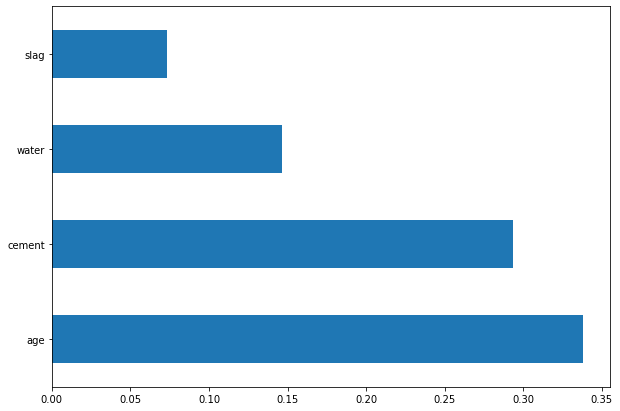

In [133]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(rfr.feature_importances_, index = X_train.columns)
feat_importances.nlargest(4).plot(kind='barh');

### Observation : The features age and water has high feature importance values among other featues.

In [134]:
# training data with 4 most important features
X_train_1 = X_train[['slag', 
                    'water',
                    'cement',
                    'age']]
# test data with 4 most important features
X_test_1 = X_test[['slag', 
                    'water',
                    'cement',
                    'age']]

# create an object of the RandfomForestRegressor Model
mod = RandomForestRegressor(n_estimators= 70,max_leaf_nodes=200,max_features='log2',max_depth=30)

# fit the model with the training data
mod.fit(X_train_1,y_train)

# predict the target on the training and test data

predict_test_with_if = mod.predict(X_test_1)
mod.score(X_test_1,y_test)

0.8893503943346509

## We see that with these 4 features, the model gives high score